In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from subprocess import check_output
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA, PCA
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import seaborn as sns
from skimage import io
import scipy
import tensorflow as tf
from sklearn.svm import SVC

2022-12-07 16:50:27.507246: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Some code from lab sheets

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#data = fashion_mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()


In [3]:
#making backup
X_train_orig, X_test_orig = X_train, X_test

In [16]:
#Y_train = to_categorical(Y_train)
#Y_test = to_categorical(Y_test)

In [5]:
X_train= X_train[:10000]
Y_train= Y_train[:10000]

print(X_train.shape)
print(Y_train.shape)


(10000, 28, 28)
(10000,)


In [1]:
"""# Example of a cat picture
index = 10
plt.imshow(X_train[index])
print (f'y = {Y_train[index]}. It\'s a {[Y_train[index]].decode("utf-8")}!')"""

'# Example of a cat picture\nindex = 10\nplt.imshow(X_train[index])\nprint (f\'y = {Y_train[index]}. It\'s a {[Y_train[index]].decode("utf-8")}!\')'

In [5]:
print (f'a) number of training examples: {X_train.shape[0]}')
print (f'b) number of testing examples: {X_test.shape[0]}')
height = X_train.shape[1]
width = X_train.shape[2]
print (f'c) each image is of size: ({height}, {width})')


a) number of training examples: 10000
b) number of testing examples: 10000
c) each image is of size: (28, 28)


In [6]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
"""
Y_train_reshaped = Y_train.reshape(Y_train.shape[0], -1)
Y_test_reshaped = Y_test.reshape(Y_test.shape[0], -1)
"""
print (f'train_x\'s shape: {X_train_reshaped.shape}')
print (f'test_x\'s shape: {X_test_reshaped.shape}')
"""print (f'train_y\'s shape: {Y_train_reshaped.shape}')
print(Y_train.shape)
print(Y_train_reshaped.shape)"""

train_x's shape: (10000, 784)
test_x's shape: (10000, 784)


"print (f'train_y's shape: {Y_train_reshaped.shape}')\nprint(Y_train.shape)\nprint(Y_train_reshaped.shape)"

In [7]:
X_train_std = StandardScaler().fit_transform(X_train_reshaped)
X_test_std = StandardScaler().fit_transform(X_test_reshaped)
print(X_test_std.shape)

(10000, 784)


In [9]:
"""
X_train_2_s = X_train_std.reshape(X_train_std.shape[0], 2)
X_test_2_s = X_test_std.reshape(X_test_std.shape[0], 2)
print(X_train_2.shape)
print(X_test_2.shape)
"""

'\nX_train_2_s = X_train_std.reshape(X_train_std.shape[0], 2)\nX_test_2_s = X_test_std.reshape(X_test_std.shape[0], 2)\nprint(X_train_2.shape)\nprint(X_test_2.shape)\n'

In [8]:
#X_train_std = X_train_reshaped/255
#X_test_std = X_test_reshaped/255

#Y_train_std = Y_train_reshaped/255
#Y_test_std = Y_test_reshaped/255

X_train_std = StandardScaler().fit_transform(X_train_reshaped)
X_test_std = StandardScaler().fit_transform(X_test_reshaped)
"""
Y_train_std = StandardScaler().fit_transform(Y_train_reshaped)
Y_test_std = StandardScaler().fit_transform(Y_test_reshaped)
"""
print (f'train_x\'s min: {X_train_std.min()}')
print (f'train_x\'s max: {X_train_std.max()}')
print (f'test_x\'s min: {X_test_std.min()}')
print (f'test_x\'s max: {X_test_std.max()}')

#print (f'train_y\'s min: {Y_train_std.min()}')
#print (f'train_y\'s max: {Y_train_std.max()}')
#print (f'test_y\'s min: {Y_test_std.min()}')
#print (f'test_y\'s max: {Y_test_std.max()}')
print(X_train_std.shape)
#print(Y_train_std.shape)

train_x's min: -2.418423256822521
train_x's max: 93.30934487254103
test_x's min: -2.4207015238304392
test_x's max: 99.31272785234981
(10000, 784)


In [9]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_std, Y_train)
print('Training accuracy: ', round(logreg.score(X_train_std, Y_train),2))
print('Testing accuracy: ', round(logreg.score(X_test_std, Y_test),2))

Training accuracy:  0.96
Testing accuracy:  0.8


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy:  1.0
Testing accuracy:  0.85


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


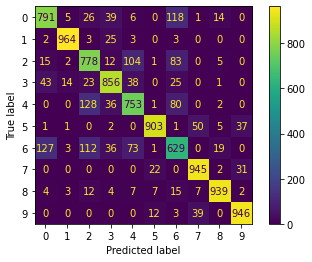

In [16]:
print('Training accuracy: ', round(nn_clf.score(X_train_std, Y_train),2))
print('Testing accuracy: ', round(nn_clf.score(X_test_std, Y_test),2))

plot_confusion_matrix(nn_clf, X_test_std, Y_test)

In [11]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)

nn_clf.fit(X_train_std, Y_train)

MLPClassifier(alpha=0, hidden_layer_sizes=64, max_iter=500, n_iter_no_change=25,
              random_state=1)

In [16]:
train_sizes, train_scores, val_scores = learning_curve(nn_clf, X_train_std, Y_train, cv=2, scoring='accuracy', n_jobs=3, train_sizes=np.linspace(0.01, 1, 10), verbose=1)


[learning_curve] Training set sizes: [  50  600 1150 1700 2250 2800 3350 3900 4450 5000]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   50.0s finished


In [17]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


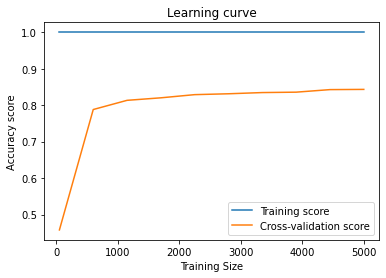

In [18]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()


1.0


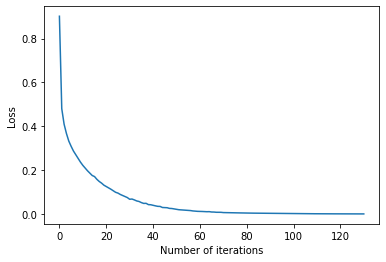

In [19]:


fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print(nn_clf.score(X_train_std, Y_train))

In [20]:

nn_clf_test = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam', #could be 'sgd'
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)

nn_clf_test.fit(X_test_std, Y_test)


MLPClassifier(alpha=0, hidden_layer_sizes=64, max_iter=500, n_iter_no_change=25,
              random_state=1)

In [21]:
test_sizes, test_scores, val_scores = learning_curve(nn_clf_test, X_test_std, Y_test, cv=2, scoring='accuracy', n_jobs=3, train_sizes=np.linspace(0.01, 1, 10), verbose=1)

[learning_curve] Training set sizes: [  50  600 1150 1700 2250 2800 3350 3900 4450 5000]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   47.4s finished


In [22]:
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


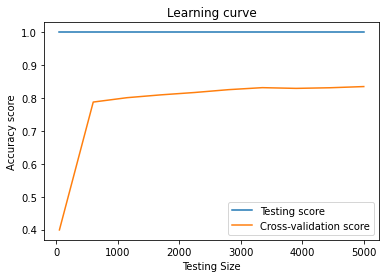

In [23]:
plt.plot(test_sizes, test_mean, label='Testing score')
plt.plot(test_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Testing Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

1.0


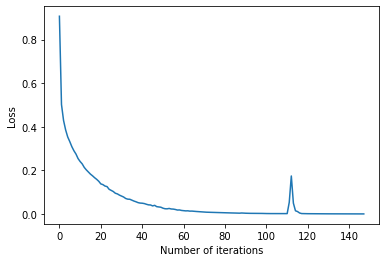

In [24]:


fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf_test.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
print(nn_clf_test.score(X_test_std, Y_test))

In [25]:
alphas = np.logspace(-3, -0, 100)
learning_rates = np.logspace(-4, -2, 100)
parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}

nn = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)

clf = RandomizedSearchCV(nn, parameters, scoring='accuracy', n_iter=10, cv=3, verbose=2)

clf.fit(X_train_std, Y_train)
clf.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END alpha=0.572236765935022, learning_rate_init=0.00020092330025650479; total time=  38.2s


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.572236765935022, learning_rate_init=0.00020092330025650479; total time=  39.6s
[CV] END alpha=0.572236765935022, learning_rate_init=0.00020092330025650479; total time=  38.0s
[CV] END alpha=0.08697490026177834, learning_rate_init=0.002595024211399737; total time=   9.2s
[CV] END alpha=0.08697490026177834, learning_rate_init=0.002595024211399737; total time=  11.7s
[CV] END alpha=0.08697490026177834, learning_rate_init=0.002595024211399737; total time=   9.5s
[CV] END alpha=0.04037017258596556, learning_rate_init=0.0002782559402207126; total time=  37.6s


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.04037017258596556, learning_rate_init=0.0002782559402207126; total time=  40.0s
[CV] END alpha=0.04037017258596556, learning_rate_init=0.0002782559402207126; total time=  33.1s
[CV] END alpha=0.0015199110829529332, learning_rate_init=0.002595024211399737; total time=   6.7s
[CV] END alpha=0.0015199110829529332, learning_rate_init=0.002595024211399737; total time=   7.1s
[CV] END alpha=0.0015199110829529332, learning_rate_init=0.002595024211399737; total time=   6.9s
[CV] END alpha=0.06135907273413173, learning_rate_init=0.004328761281083062; total time=   6.8s
[CV] END alpha=0.06135907273413173, learning_rate_init=0.004328761281083062; total time=   7.3s
[CV] END alpha=0.06135907273413173, learning_rate_init=0.004328761281083062; total time=   6.8s
[CV] END alpha=0.01519911082952934, learning_rate_init=0.00010476157527896651; total time=  38.8s
[CV] END alpha=0.01519911082952934, learning_rate_init=0.00010476157527896651; total time=  39.3s
[CV] END alpha=0.01519911082

/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'learning_rate_init': 0.00020092330025650479, 'alpha': 0.572236765935022}

In [22]:
nn_clf_best = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    #alpha=0.7564633275546291,
                    #learning_rate_init=0.0003853528593710527,
                    alpha=0.572236765935022,
                    learning_rate_init=0.00020092330025650479,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf_best.fit(X_train_std, Y_train)
print(nn_clf_best.score(X_train_std, Y_train))
print(nn_clf_best.score(X_test_std, Y_test))

0.9942
0.8579


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
nn_clf_best_lr1 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    #alpha=0.7564633275546291,
                    #learning_rate_init=0.0003853528593710527,
                    alpha=0.572236765935022,
                    learning_rate_init=0.1,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf_best_lr1.fit(X_train_std, Y_train)

print(nn_clf_best_lr1.score(X_train_std, Y_train))
print(nn_clf_best_lr1.score(X_test_std, Y_test))

0.746
0.7303


In [30]:
nn_clf_best_lr01 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    #alpha=0.7564633275546291,
                    #learning_rate_init=0.0003853528593710527,
                    alpha=0.572236765935022,
                    learning_rate_init=0.01,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf_best_lr01.fit(X_train_std, Y_train)

print(nn_clf_best_lr01.score(X_train_std, Y_train))
print(nn_clf_best_lr01.score(X_test_std, Y_test))

0.8967
0.8411


In [31]:
nn_clf_best_lr001 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    #alpha=0.7564633275546291,
                    #learning_rate_init=0.0003853528593710527,
                    alpha=0.572236765935022,
                    learning_rate_init=0.001,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf_best_lr001.fit(X_train_std, Y_train)

print(nn_clf_best_lr001.score(X_train_std, Y_train))
print(nn_clf_best_lr001.score(X_test_std, Y_test))

0.9902
0.8559


In [32]:
nn_clf_best_lr0001 = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    #alpha=0.7564633275546291,
                    #learning_rate_init=0.0003853528593710527,
                    alpha=0.572236765935022,
                    learning_rate_init=0.0001,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf_best_lr0001.fit(X_train_std, Y_train)

print(nn_clf_best_lr0001.score(X_train_std, Y_train))
print(nn_clf_best_lr0001.score(X_test_std, Y_test))

0.9935
0.8571


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9942


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


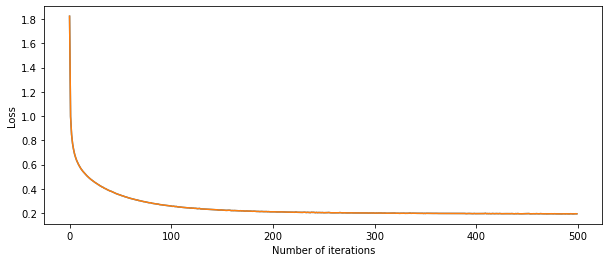

In [14]:



fig, ax = plt.subplots(figsize=(10,4))
ax.plot(nn_clf_best.loss_curve_)
ax.plot(nn_clf_best.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print(nn_clf_best.score(X_train_std, Y_train))

0.9941


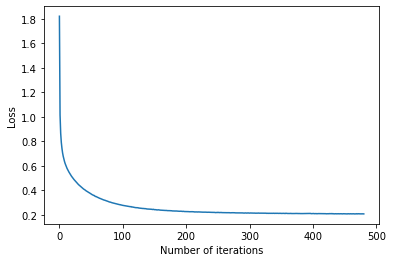

In [29]:
nn_clf_best_test = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0.572236765935022,
                    learning_rate_init=0.00020092330025650479,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)

nn_clf_best_test.fit(X_test_std, Y_test)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf_best_test.loss_curve_)

ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print(nn_clf_best_test.score(X_test_std, Y_test))

/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9941
0.8667


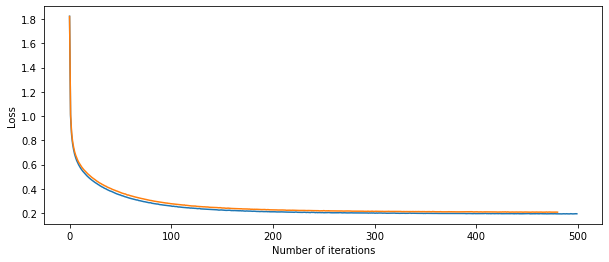

In [30]:
nn_clf_best_both = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    alpha=0.572236765935022,
                    learning_rate_init=0.00020092330025650479,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)



fig, ax = plt.subplots(figsize=(10,4))
nn_clf_best_both.fit(X_train_std, Y_train)
ax.plot(nn_clf_best_both.loss_curve_)
nn_clf_best_both.fit(X_test_std, Y_test)
ax.plot(nn_clf_best_both.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

print(nn_clf_best_both.score(X_test_std, Y_test))
print(nn_clf_best_both.score(X_train_std, Y_train))



In [15]:
print('Training accuracy: ', round(nn_clf_best.score(X_train_std, Y_train),2))
print('Testing accuracy: ', round(nn_clf_best.score(X_test_std, Y_test),2))

Training accuracy:  0.99
Testing accuracy:  0.86


In [31]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_train_std)

In [32]:
nn_clf_best.fit(X_pca, Y_train)

/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.572236765935022, hidden_layer_sizes=64,
              learning_rate_init=0.00020092330025650479, max_iter=500,
              n_iter_no_change=25, random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

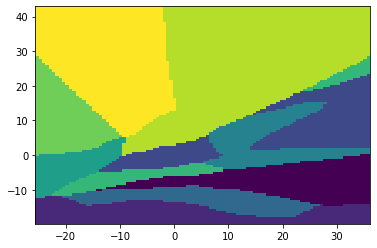

In [33]:
plt.viridis()
DecisionBoundaryDisplay.from_estimator(nn_clf_best, X_pca ,response_method='predict',plot_method='pcolormesh')
plt_title= 'Decision Boundary ANN', 
plt.xlabel=('PC-1')
plt.ylabel= ('PC-2')
plt.show
